# 05 Evaluation & Visualisation

This notebook covers both evaluation (metrics) and result visualisation for your oil spill segmentation project:
- Computes metrics (IoU, Dice, pixel accuracy, etc.)
- Generates side-by-side comparisons (input, GT, prediction)
- Overlays masks on images
- Saves high-quality visual summaries for reports/dashboards

## 1. Imports & Setup

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

os.makedirs('results/visualisation', exist_ok=True)

## 2. Set File Paths
- Update these if your files are elsewhere.

In [2]:
input_img_path = '../data/processed/test/images/Oil (21).jpg'  # Original satellite image
gt_mask_path   = '../data/processed/test/masks/Oil (21).jpg'  # Ground truth mask
pred_mask_path = 'predicted_mask.png'  # Model-predicted mask

img_size = (256, 256)

## 3. Load Images

In [3]:
def safe_load_image(path, mode, size):
    try:
        img = Image.open(path).convert(mode).resize(size)
        return img
    except FileNotFoundError:
        print(f'❌ File not found: {path}')
        return None

img  = safe_load_image(input_img_path, 'RGB', img_size)
gt   = safe_load_image(gt_mask_path,   'L',   img_size)
pred = safe_load_image(pred_mask_path, 'L',   img_size)

if img is None or gt is None or pred is None:
    raise FileNotFoundError('One or more required files are missing. Please check the file paths above.')

## 4. Evaluation Metrics

In [4]:
def compute_metrics(gt_mask, pred_mask):
    # Ensure binary
    gt_mask_bin = (np.array(gt_mask) > 127).astype(np.uint8)
    pred_mask_bin = (np.array(pred_mask) > 127).astype(np.uint8)
    
    intersection = np.logical_and(gt_mask_bin, pred_mask_bin).sum()
    union = np.logical_or(gt_mask_bin, pred_mask_bin).sum()
    iou = intersection / union if union != 0 else 1.0
    dice = (2. * intersection) / (gt_mask_bin.sum() + pred_mask_bin.sum() + 1e-8)
    pixel_acc = (gt_mask_bin == pred_mask_bin).mean()
    return {
        'IoU': iou,
        'Dice': dice,
        'Pixel Accuracy': pixel_acc
    }

metrics = compute_metrics(gt, pred)
for k,v in metrics.items():
    print(f'{k}: {v:.4f}')

IoU: 0.9854
Dice: 0.9926
Pixel Accuracy: 0.9854


## 5. Visualisation Functions

In [5]:
def show_side_by_side(img, gt, pred, save_path=None):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(img)
    axs[0].set_title('Original')
    axs[0].axis('off')
    axs[1].imshow(gt, cmap='gray')
    axs[1].set_title('Ground Truth')
    axs[1].axis('off')
    axs[2].imshow(pred, cmap='gray')
    axs[2].set_title('Predicted')
    axs[2].axis('off')
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)
    plt.show()

def overlay_mask(img, mask, cmap='jet', alpha=0.4, title='', save_path=None):
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.imshow(mask, cmap=cmap, alpha=alpha)
    plt.title(title)
    plt.axis('off')
    if save_path:
        plt.savefig(save_path)
    plt.show()

def summary_figure(img, gt, pred, save_path=None):
    fig, axs = plt.subplots(1, 4, figsize=(20,5))
    axs[0].imshow(img)
    axs[0].set_title('Original')
    axs[0].axis('off')
    axs[1].imshow(gt, cmap='gray')
    axs[1].set_title('Ground Truth')
    axs[1].axis('off')
    axs[2].imshow(pred, cmap='gray')
    axs[2].set_title('Predicted')
    axs[2].axis('off')
    axs[3].imshow(img)
    axs[3].imshow(pred, cmap='jet', alpha=0.4)
    axs[3].set_title('Overlay: Predicted')
    axs[3].axis('off')
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)
    plt.show()

## 6. Show & Save Visualisations

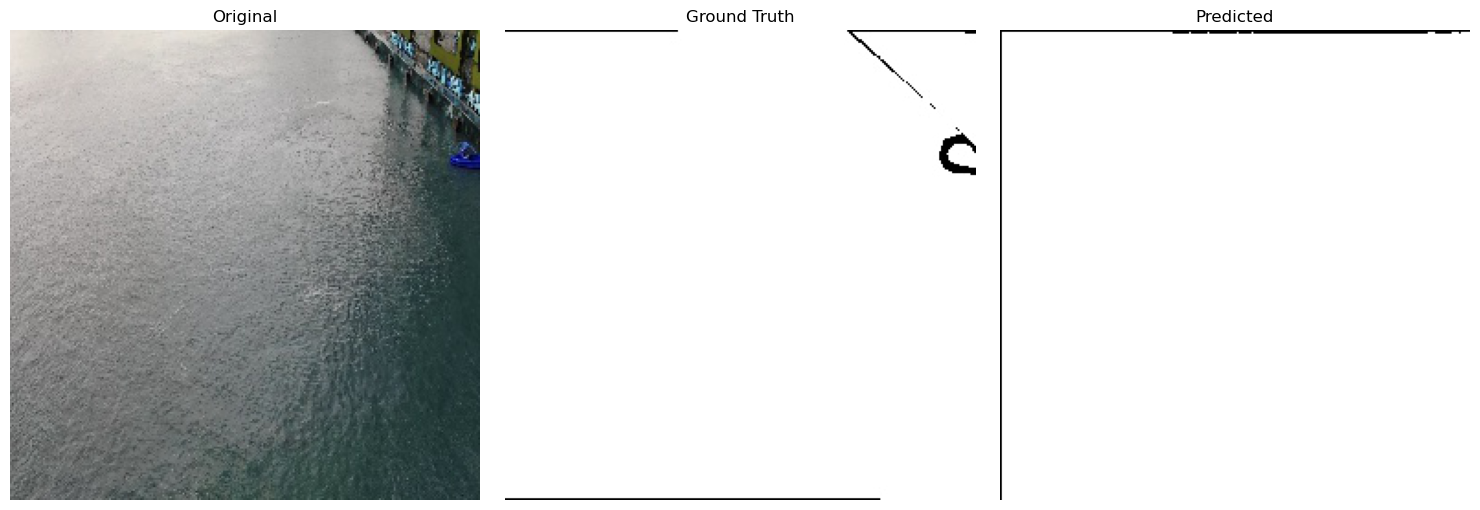

Saved side-by-side summary to results/visualisation/side_by_side.png


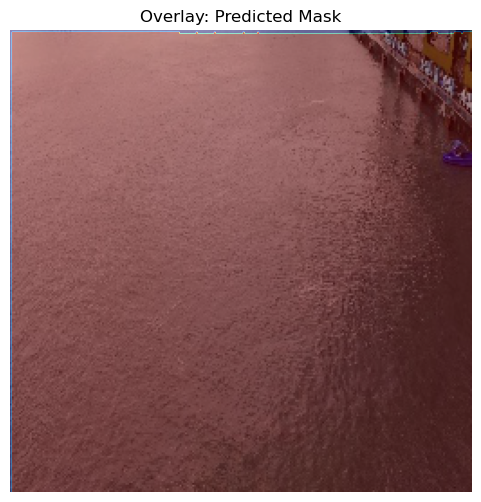

Saved predicted overlay to results/visualisation/overlay_pred.png


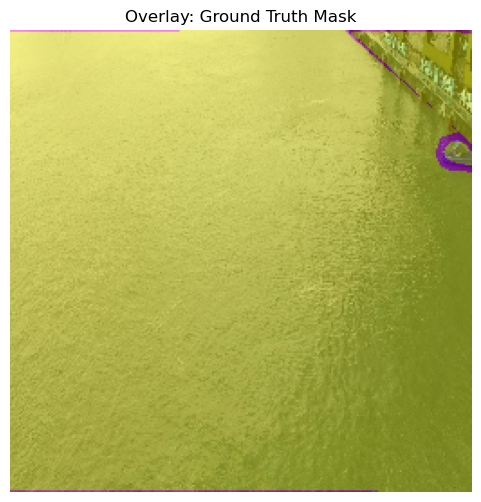

Saved ground truth overlay to results/visualisation/overlay_gt.png


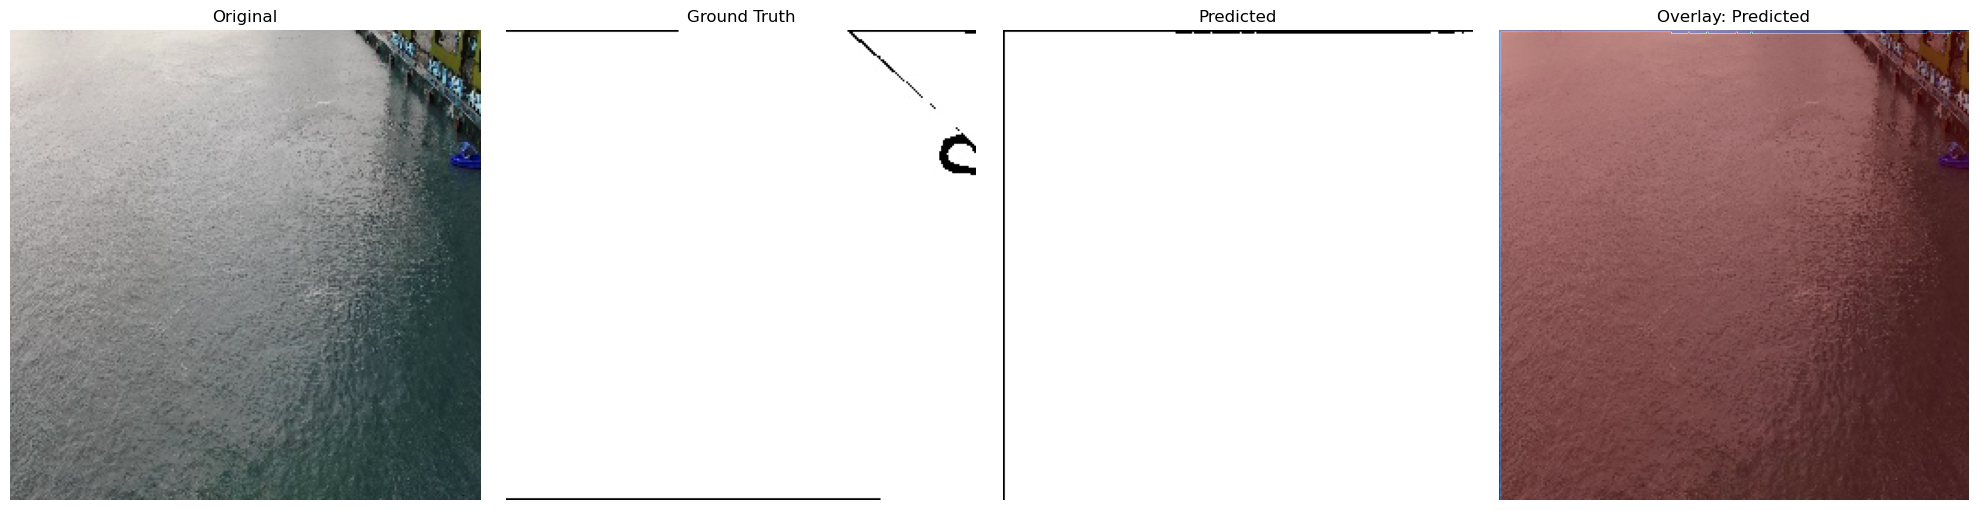

Saved full visual summary to results/visualisation/visual_summary.png


In [6]:
sidebyside_path = 'results/visualisation/side_by_side.png'
overlay_pred_path = 'results/visualisation/overlay_pred.png'
overlay_gt_path = 'results/visualisation/overlay_gt.png'
summary_path = 'results/visualisation/visual_summary.png'

show_side_by_side(img, gt, pred, save_path=sidebyside_path)
print(f'Saved side-by-side summary to {sidebyside_path}')

overlay_mask(img, pred, cmap='jet', alpha=0.4, title='Overlay: Predicted Mask', save_path=overlay_pred_path)
print(f'Saved predicted overlay to {overlay_pred_path}')

overlay_mask(img, gt, cmap='spring', alpha=0.4, title='Overlay: Ground Truth Mask', save_path=overlay_gt_path)
print(f'Saved ground truth overlay to {overlay_gt_path}')

summary_figure(img, gt, pred, save_path=summary_path)
print(f'Saved full visual summary to {summary_path}')